In [102]:
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

Канзепаров Руслан ФЗ-11<br>
Лабораторная работа №5<br>


Задачи:
1. Составить набор правил нечеткой логики.
2. Протестировать полученную модель.
3. В заключении указать полученные новые навыки, умения, знания.



Цель нечеткой логики: <br>
Работа кондиционера, который регулирует свои параметры для оптимального энергопотребления.

<h3> Настройка входных атрибутов

In [103]:
temp = ctrl.Antecedent(np.arange(16,31,1),'temp')
t_dif = ctrl.Antecedent(np.arange(-1.5,1.5,0.1),'t_dif')
d_point = ctrl.Antecedent(np.arange(10,18,1),'dew')
e_volt = ctrl.Antecedent(np.arange(130,220,10),'ev')

Для нечеткой логики, использовалась библиотека skfuzzy - библиотека набора инструменттов нечеткой логики.

In [104]:
# Значения функции для температуры
temp['Низкая'] = fuzzy.trapmf(temp.universe,[16,16,22,25])
temp['Средняя'] = fuzzy.trimf(temp.universe,[22,25,28])
temp['Высокая'] = fuzzy.trapmf(temp.universe,[25,28,30,30])


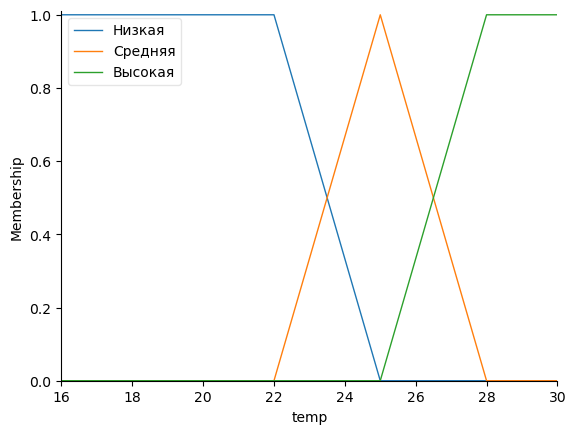

In [105]:
temp.view()

In [106]:
# Значения функции для разницы температур
t_dif['Отрицательная'] = fuzzy.trapmf(t_dif.universe,[-1.5,-1.5,-1,0])
t_dif['Нулевая'] = fuzzy.trimf(t_dif.universe,[-0.5,0,0.5])
t_dif['Положительная'] = fuzzy.trapmf(t_dif.universe,[0,1,2,2])

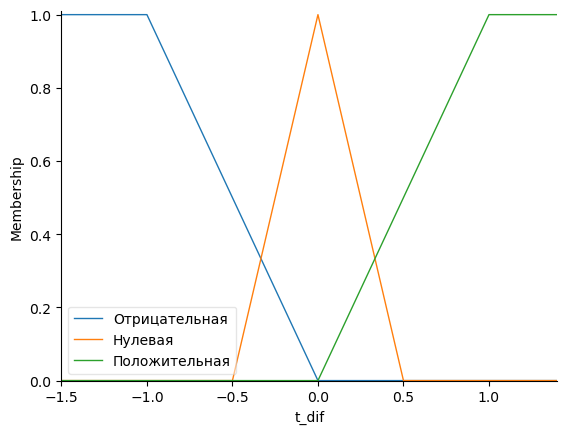

In [107]:
t_dif.view()

In [108]:
# Знаения функции для температуры точки росы
d_point['Оптимальная'] = fuzzy.trapmf(d_point.universe,[10,10,11,14])
d_point['Влажная'] = fuzzy.trapmf(d_point.universe,[12,15,18,18])

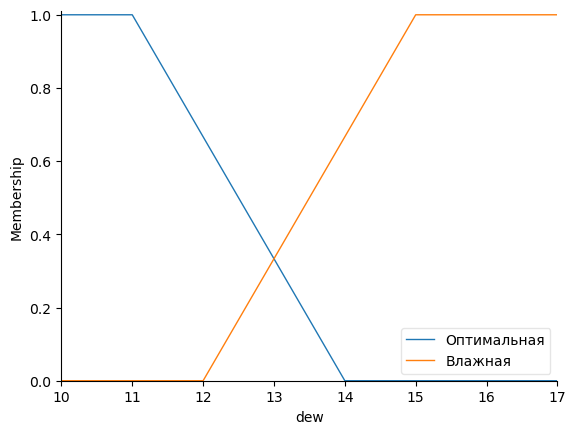

In [109]:
d_point.view()

In [110]:
# Значения функции для электрического напряжения
e_volt['Низкая'] = fuzzy.trapmf(e_volt.universe,[130,130,160,180])
e_volt['Высокая'] = fuzzy.trapmf(e_volt.universe,[170,190,220,220])

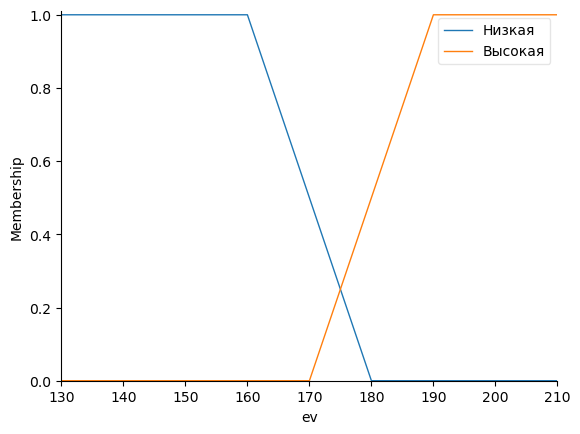

In [111]:
e_volt.view()

<h3> Настройка выходных параметров</h3>

In [112]:
c_speed = ctrl.Consequent(np.arange(0,110,10),'comp_speed')
f_speed = ctrl.Consequent(np.arange(0,110,10),'fan_speed')
mo = ctrl.Consequent(np.arange(0,1.1,0.1),'mo')
f_dir = ctrl.Consequent(np.arange(0,100,10),'f_dir')

In [113]:
#Значения функции для скорости компрессора
c_speed['Низкая'] = fuzzy.trapmf(c_speed.universe,[0,0,30,50])
c_speed['Средняя'] = fuzzy.trimf(c_speed.universe,[40,60,80])
c_speed['Быстрая'] = fuzzy.trapmf(c_speed.universe,[70,90,100,100])

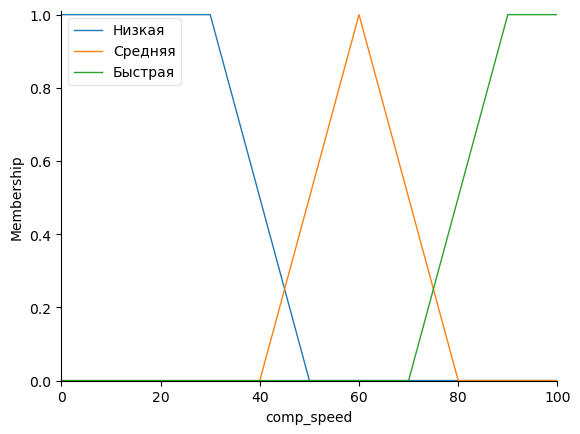

In [114]:
c_speed.view()

In [115]:
# Значения функции для скорости вентилятора
f_speed['Низкая'] = fuzzy.trapmf(f_speed.universe,[0,0,30,50])
f_speed['Средняя'] = fuzzy.trimf(f_speed.universe,[40,60,80])
f_speed['Быстрая'] = fuzzy.trapmf(f_speed.universe,[70,90,100,100])

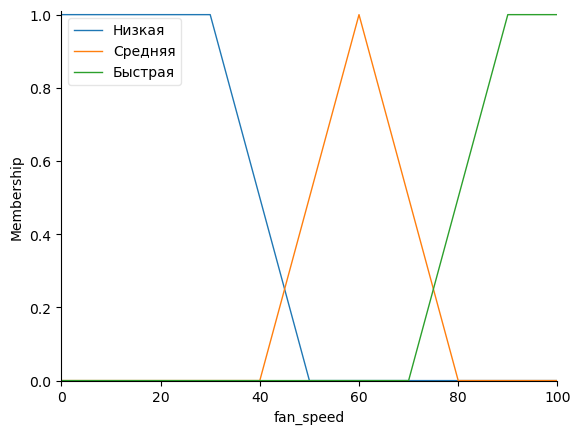

In [116]:
f_speed.view()

In [117]:
# Значения функции для режима работы
mo['Активный'] = fuzzy.trimf(mo.universe,[0,1,1])
mo['Ограниченный'] = fuzzy.trimf(mo.universe,[0,0,1])

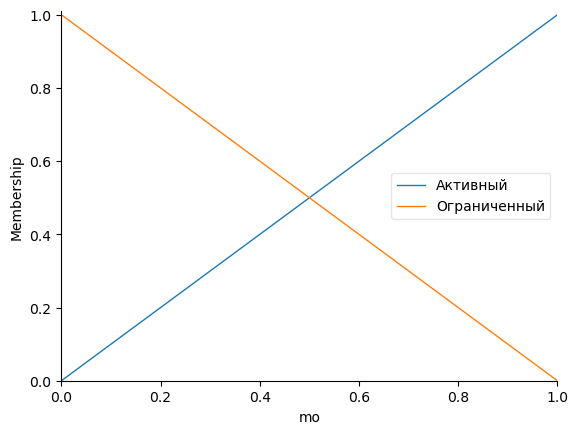

In [118]:
mo.view()

In [119]:
#Значения функции для направления кондиционера
f_dir['По направлению'] = fuzzy.trapmf(f_dir.universe,[0,0,40,70])
f_dir['Против направления'] = fuzzy.trapmf(f_dir.universe,[40,70,90,90])

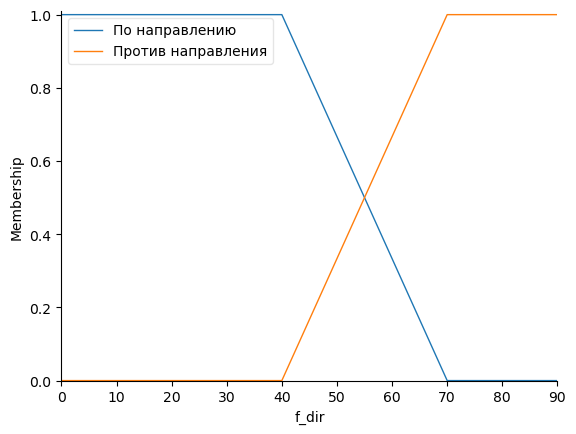

In [120]:
f_dir.view()

<h3> Список правил нечеткой логики.</h3> <br>
<h3>В сумме получилось 36 правил</h3>

In [121]:
csr_list = []

# Если температура низкая, разница температур отрицательная, точка росы оптимальная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_1 = ctrl.Rule(temp['Низкая']&t_dif['Отрицательная']&d_point['Оптимальная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_1)
# Если температура средняя, разница температур отрицательная, точка росы оптимальная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_2 = ctrl.Rule(temp['Средняя']&t_dif['Отрицательная']&d_point['Оптимальная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_2)
# Если температура высокая, разница температур отрицательная, точка росы оптимальная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_3 = ctrl.Rule(temp['Высокая']&t_dif['Отрицательная']&d_point['Оптимальная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_3)
# Если температура низкая, разница температур нулевая, точка росы оптимальная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_4 = ctrl.Rule(temp['Низкая']&t_dif['Нулевая']&d_point['Оптимальная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_4)
# Если температура средняя, разница температур нулевая, точка росы оптимальная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_5 = ctrl.Rule(temp['Средняя']&t_dif['Нулевая']&d_point['Оптимальная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_5)
# Если температура высокая, разница температур нулевая, точка росы оптимальная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_6 = ctrl.Rule(temp['Высокая']&t_dif['Нулевая']&d_point['Оптимальная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_6)
# Если температура низкая, разница температур положительная, точка росы оптимальная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_7 = ctrl.Rule(temp['Низкая']&t_dif['Положительная']&d_point['Оптимальная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_7)
# Если температура средняя, разница температур положительная, точка росы оптимальная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_8 = ctrl.Rule(temp['Средняя']&t_dif['Положительная']&d_point['Оптимальная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_8)
# Если температура высокая, разница температур положительная, точка росы оптимальная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_9 = ctrl.Rule(temp['Высокая']&t_dif['Положительная']&d_point['Оптимальная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_9)
# Если температура низкая, разница температур отрицательная, точка росы оптимальная и электрическое напряжение высокое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_10 = ctrl.Rule(temp['Низкая']&t_dif['Отрицательная']&d_point['Оптимальная']&e_volt['Высокая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_10)
# Если температура средняя, разница температур отрицательная, точка росы оптимальная и электрическое напряжение высокое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_11 = ctrl.Rule(temp['Средняя']&t_dif['Отрицательная']&d_point['Оптимальная']&e_volt['Высокая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_11)
# Если температура высокая, разница температур отрицательная, точка росы оптимальная и электрическое напряжение высокое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_12 = ctrl.Rule(temp['Высокая']&t_dif['Отрицательная']&d_point['Оптимальная']&e_volt['Высокая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_12)
# Если температура низкая, разница температур нулевая, точка росы оптимальная и электрическое напряжение высокое, то скорость компрессора низкая, скорость вентилятора быстрая, активный, и поток воздуха по направлению.
rule_13 = ctrl.Rule(temp['Низкая']&t_dif['Нулевая']&d_point['Оптимальная']&e_volt['Высокая'],[c_speed['Низкая'],f_speed['Быстрая'],mo['Активный'],f_dir['По направлению']])
csr_list.append(rule_13)
# Если температура средняя, разница температур нулевая, точка росы оптимальная и электрическое напряжение высокое, то скорость компрессора низкая, скорость вентилятора средняя, активный, и поток воздуха по направлению.
rule_14 = ctrl.Rule(temp['Средняя']&t_dif['Нулевая']&d_point['Оптимальная']&e_volt['Высокая'],[c_speed['Низкая'],f_speed['Средняя'],mo['Активный'],f_dir['По направлению']])
csr_list.append(rule_14)
# Если температура высокая, разница температур нулевая, точка росы оптимальная и электрическое напряжение высокое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_15 = ctrl.Rule(temp['Высокая']&t_dif['Нулевая']&d_point['Оптимальная']&e_volt['Высокая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_15)
# Если температура низкая, разница температур положительная, точка росы оптимальная и электрическое напряжение высокое, то скорость компрессора быстрая, скорость вентилятора быстрая, активный, и поток воздуха по направлению.
rule_16 = ctrl.Rule(temp['Низкая']&t_dif['Положительная']&d_point['Оптимальная']&e_volt['Высокая'],[c_speed['Быстрая'],f_speed['Быстрая'],mo['Активный'],f_dir['По направлению']])
csr_list.append(rule_16)
# Если температура средняя, разница температур положительная, точка росы оптимальная и электрическое напряжение высокое, то скорость компрессора средняя, скорость вентилятора средняя, активный, и поток воздуха по направлению.
rule_17 = ctrl.Rule(temp['Средняя']&t_dif['Положительная']&d_point['Оптимальная']&e_volt['Высокая'],[c_speed['Средняя'],f_speed['Средняя'],mo['Активный'],f_dir['По направлению']])
csr_list.append(rule_17)
# Если температура высокая, разница температур положительная, точка росы оптимальная и электрическое напряжение высокое, то скорость компрессора низкая, скорость вентилятора средняя, активный, и поток воздуха по направлению.
rule_18 = ctrl.Rule(temp['Высокая']&t_dif['Положительная']&d_point['Оптимальная']&e_volt['Высокая'],[c_speed['Средняя'],f_speed['Средняя'],mo['Активный'],f_dir['По направлению']])
csr_list.append(rule_18)
# Если температура низкая, разница температур отрицательная, точка росы влажная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_19 = ctrl.Rule(temp['Низкая']&t_dif['Отрицательная']&d_point['Влажная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_19)
# Если температура средняя, разница температур отрицательная, точка росы влажная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_20 = ctrl.Rule(temp['Средняя']&t_dif['Отрицательная']&d_point['Влажная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_20)
# Если температура высокая, разница температур отрицательная, точка росы влажная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_21 = ctrl.Rule(temp['Высокая']&t_dif['Отрицательная']&d_point['Влажная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_21)
# Если температура низкая, разница температур нулевая, точка росы влажная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_22 = ctrl.Rule(temp['Низкая']&t_dif['Нулевая']&d_point['Влажная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_22)
# Если температура средняя, разница температур нулевая, точка росы влажная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_23 = ctrl.Rule(temp['Средняя']&t_dif['Нулевая']&d_point['Влажная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_23)
# Если температура высокая, разница температур нулевая, точка росы влажная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_24 = ctrl.Rule(temp['Высокая']&t_dif['Нулевая']&d_point['Влажная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_24)
# Если температура низкая, разница температур положительная, точка росы влажная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_25 = ctrl.Rule(temp['Низкая']&t_dif['Положительная']&d_point['Влажная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_25)
# Если температура средняя, разница температур положительная, точка росы влажная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_26 = ctrl.Rule(temp['Средняя']&t_dif['Положительная']&d_point['Влажная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_26)
# Если температура высокая, разница температур положительная, точка росы влажная и электрическое напряжение низкое, то скорость компрессора низкая, скорость вентилятора низкая, активный, и поток воздуха против направления.
rule_27 = ctrl.Rule(temp['Высокая']&t_dif['Положительная']&d_point['Влажная']&e_volt['Низкая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Активный'],f_dir['Против направления']])
csr_list.append(rule_27)
# Если температура низкая, разница температур отрицательная, точка росы влажная и электрическое напряжение высокое, то скорость компрессора быстрая, скорость вентилятора быстрая, ограниченный, и поток воздуха по направлению.
rule_28 = ctrl.Rule(temp['Низкая']&t_dif['Отрицательная']&d_point['Влажная']&e_volt['Высокая'],[c_speed['Быстрая'],f_speed['Быстрая'],mo['Ограниченный'],f_dir['По направлению']])
csr_list.append(rule_28)
# Если температура средняя, разница температур отрицательная, точка росы влажная и электрическое напряжение высокое, то скорость компрессора низкая, скорость вентилятора низкая, ограниченный, и поток воздуха против направления.
rule_29 = ctrl.Rule(temp['Средняя']&t_dif['Отрицательная']&d_point['Влажная']&e_volt['Высокая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Ограниченный'],f_dir['Против направления']])
csr_list.append(rule_29)
# Если температура высокая, разница температур отрицательная, точка росы влажная и электрическое напряжение высокое, то скорость компрессора низкая, скорость вентилятора низкая, ограниченный, и поток воздуха против направления.
rule_30 = ctrl.Rule(temp['Высокая']&t_dif['Отрицательная']&d_point['Влажная']&e_volt['Высокая'],[c_speed['Низкая'],f_speed['Низкая'],mo['Ограниченный'],f_dir['Против направления']])
csr_list.append(rule_30)
# Если температура низкая, разница температур нулевая, точка росы влажная и электрическое напряжение высокая, то скорость компрессора быстрая, скорость вентилятора быстрая, ограниченный, и поток воздуха по направлению.
rule_31 = ctrl.Rule(temp['Низкая']&t_dif['Нулевая']&d_point['Влажная']&e_volt['Высокая'],[c_speed['Быстрая'],f_speed['Быстрая'],mo['Ограниченный'],f_dir['По направлению']])
csr_list.append(rule_31)
# Если температура средняя, разница температур нулевая, точка росы влажная и электрическое напряжение высокое, то скорость компрессора средняя, скорость вентилятора быстрая, ограниченный, и поток воздуха по направлению.
rule_32 = ctrl.Rule(temp['Средняя']&t_dif['Нулевая']&d_point['Влажная']&e_volt['Высокая'],[c_speed['Средняя'],f_speed['Быстрая'],mo['Ограниченный'],f_dir['По направлению']])
csr_list.append(rule_32)
# Если температура высокая, разница температур нулевая, точка росы влажная и электрическое напряжение высокое, то скорость компрессора средняя, скорость вентилятора средняя, ограниченный, и поток воздуха по направлению.
rule_33 = ctrl.Rule(temp['Высокая']&t_dif['Нулевая']&d_point['Влажная']&e_volt['Высокая'],[c_speed['Средняя'],f_speed['Средняя'],mo['Ограниченный'],f_dir['По направлению']])
csr_list.append(rule_33)
# Если температура низкая, разница температур положительная, точка росы влажная и электрическое напряжение высокое, то скорость компрессора быстрая, скорость вентилятора быстрая, активный, и поток воздуха по направлению.
rule_34 = ctrl.Rule(temp['Низкая']&t_dif['Положительная']&d_point['Влажная']&e_volt['Высокая'],[c_speed['Быстрая'],f_speed['Быстрая'],mo['Активный'],f_dir['По направлению']])
csr_list.append(rule_34)
# Если температура средняя, разница температур положительная, точка росы влажная и электрическое напряжение высокое, то скорость компрессора быстрая, скорость вентилятора быстрая, активный, и поток воздуха по направлению.
rule_35 = ctrl.Rule(temp['Средняя']&t_dif['Положительная']&d_point['Влажная']&e_volt['Высокая'],[c_speed['Быстрая'],f_speed['Быстрая'],mo['Активный'],f_dir['По направлению']])
csr_list.append(rule_35)
# Если температура высокая, разница температур положительная, точка росы влажная и электрическое напряжение высокое, то скорость компрессора средняя, скорость вентилятора быстрая, активный, и поток воздуха по направлению.
rule_36 = ctrl.Rule(temp['Высокая']&t_dif['Положительная']&d_point['Влажная']&e_volt['Высокая'],[c_speed['Средняя'],f_speed['Быстрая'],mo['Активный'],f_dir['По направлению']])
csr_list.append(rule_36)


<h3> Создаем систему управления и систему моделирования системы управления</h3>

In [122]:
ac_ctrl = ctrl.ControlSystem(csr_list)

In [123]:
ac = ctrl.ControlSystemSimulation(ac_ctrl)

<h3> Первое тестирование</h3>


In [124]:
# Входные данные тестирования
# Test 1
ac.input['temp']  = 17
ac.input['t_dif'] = -0.9
ac.input['dew'] = 11
ac.input['ev'] = 160
ac.compute()
print(ac.output['comp_speed'],ac.output['fan_speed'],ac.output['mo'],ac.output['f_dir'])

20.82926829268293 20.82926829268293 0.6636363636363637 70.9178082191781


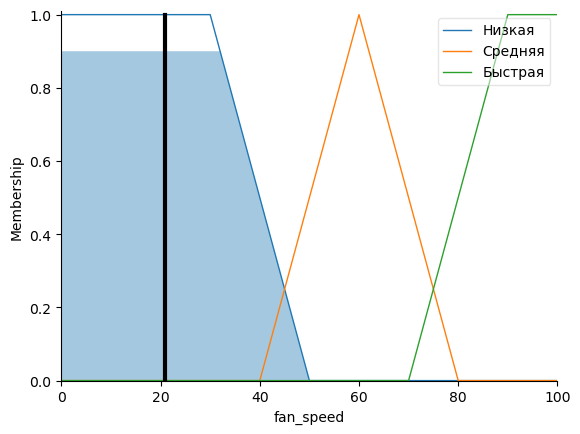

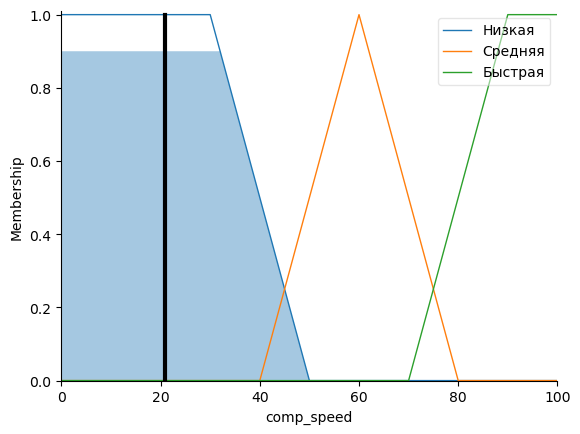

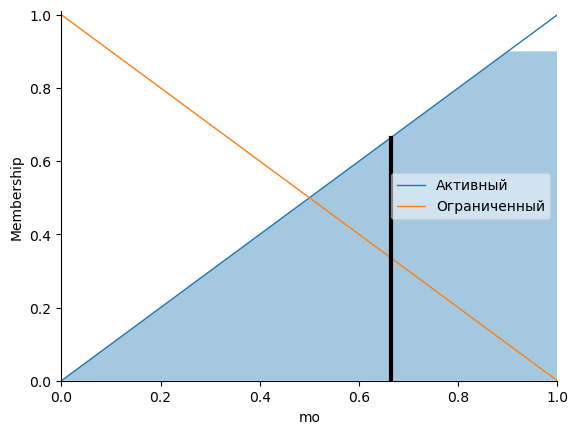

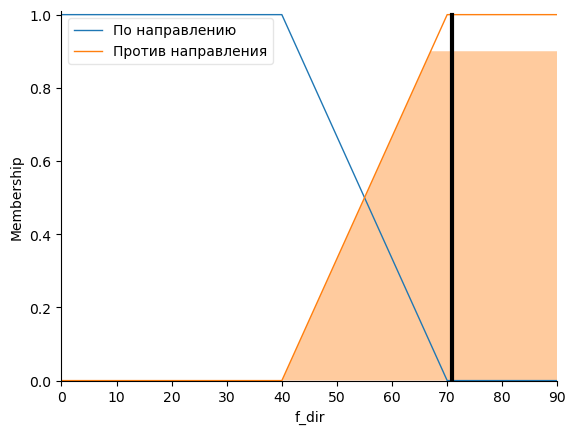

In [125]:
# Выходные данные тестирования
f_speed.view(sim=ac)
c_speed.view(sim=ac)
mo.view(sim=ac)
f_dir.view(sim=ac)

None


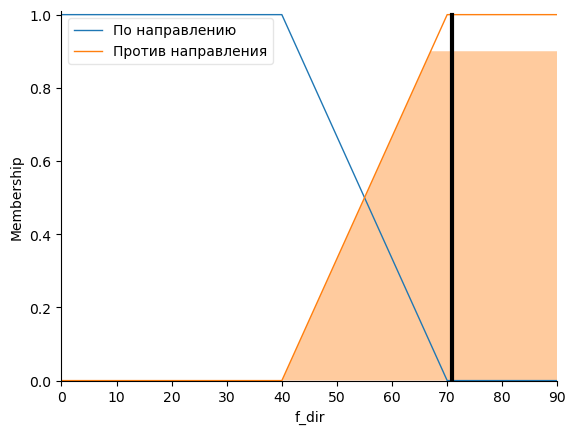

In [126]:
print(f_dir.view(sim=ac))

In [127]:
ac.output

OrderedDict([('comp_speed', 20.82926829268293),
             ('fan_speed', 20.82926829268293),
             ('mo', 0.6636363636363637),
             ('f_dir', 70.9178082191781)])

<h3> Преобразование вывода нечетких множетсв</h3>

In [135]:
def get_linguist(valmf,val,val_range):
    mf_keys = list(valmf.terms.keys())
    mf_value_list = []
    for i in range(len(mf_keys)):
        mf_value_list.append(fuzzy.interp_membership(val_range,valmf[mf_keys[i]].mf,val))
    max_mf = max(mf_value_list)
    ling_key = ''
    for i in range(len(mf_keys)):
        if max_mf == mf_value_list[i]:
            ling_key = mf_keys[i]
            break
    return ling_key       

In [129]:
print(get_linguist(f_speed,ac.output['fan_speed'],np.arange(0,110,10)))

Низкая


In [130]:
temp_range = np.arange(16,31,1)
tdif_range = np.arange(-1,3,0.1)
dew_range = np.arange(10,18,1)
ev_range = np.arange(130,220,10)
c_speed_range = np.arange(0,110,10)
f_speed_range = np.arange(0,110,10)
mo_range = np.arange(0,1.1,0.1)
dir_range = np.arange(0,100,10)

In [131]:
temp_list = []
tdif_list = []
dew_list = []
ev_list = []
temp_list.append(np.random.randint(low=16,high = 22))
temp_list.append(np.random.randint(low=23,high = 27))
temp_list.append(np.random.randint(low=27,high = 30))
tdif_list.append(float(np.random.uniform(low = -1,high = -0.6,size=(1,1))))
tdif_list.append(float(np.random.uniform(low = -0.5,high = 0.5,size=(1,1))))
tdif_list.append(float(np.random.uniform(low = 0.6,high = 1,size=(1,1))))
tdif_list.append(float(np.random.uniform(low = 1.1,high = 3,size=(1,1))))
dew_list.append(np.random.randint(low=10,high=13))
dew_list.append(np.random.randint(low=14,high=18))
ev_list.append(np.random.randint(low=130,high=160))
ev_list.append(np.random.randint(low=170,high=220))
print(temp_list)
print(tdif_list)
print(dew_list)
print(ev_list)

[18, 26, 29]
[-0.8281736359779577, -0.09706238803938416, 0.8679632871073446, 1.665996128874613]
[11, 14]
[133, 200]


<h3> Отображение нечетких данных</h3>

In [132]:
print('temp','      t_dif       ','     dew     ',' ev   ','   cs   ','   fs'   ,'     mo   ','     f_dir   ')
for i in range(len(temp_list)):
    for j in range(len(tdif_list)):
        for k in range(len(dew_list)):
            for p in range(len(ev_list)):
                ac.input['temp'] = temp_list[i]
                ac.input['t_dif'] = tdif_list[j]
                ac.input['dew'] = dew_list[k]
                ac.input['ev'] = ev_list[p]
                ac.compute()
                print(temp_list[i],tdif_list[j],dew_list[k],ev_list[p],ac.output['comp_speed'],ac.output['fan_speed'],ac.output['mo'],ac.output['f_dir'])

temp       t_dif             dew       ev       cs       fs      mo         f_dir   
18 -0.8281736359779577 11 133 21.133141135408316 21.133141135408316 0.6582682951787897 70.52684333888008
18 -0.8281736359779577 11 200 21.133141135408316 21.133141135408316 0.6582682951787897 70.52684333888008
18 -0.8281736359779577 14 133 21.837606837606838 21.837606837606838 0.6388888888888888 69.58333333333334
18 -0.8281736359779577 14 200 88.01587301587303 88.01587301587303 0.3611111111111111 30.277777777777782
18 -0.09706238803938416 11 133 21.22869714208051 21.22869714208051 0.6561472666166487 70.40168471314661
18 -0.09706238803938416 11 200 21.22869714208051 74.96005856544103 0.6561472666166487 31.7467116508855
18 -0.09706238803938416 14 133 21.837606837606838 21.837606837606838 0.6388888888888888 69.58333333333334
18 -0.09706238803938416 14 200 88.01587301587303 88.01587301587303 0.36111111111111116 30.277777777777782
18 0.8679632871073446 11 133 20.964053189425538 20.964053189425538 0.66153323

29 1.665996128874613 11 133 20.416666666666664 20.416666666666664 0.6666666666666666 71.42857142857143
29 1.665996128874613 11 200 60.0 60.0 0.6666666666666666 28.181818181818187
29 1.665996128874613 14 133 21.837606837606838 21.837606837606838 0.6388888888888888 69.58333333333334
29 1.665996128874613 14 200 59.999999999999986 88.01587301587303 0.6388888888888888 30.277777777777782


<h3> Второе тестирование</h3>

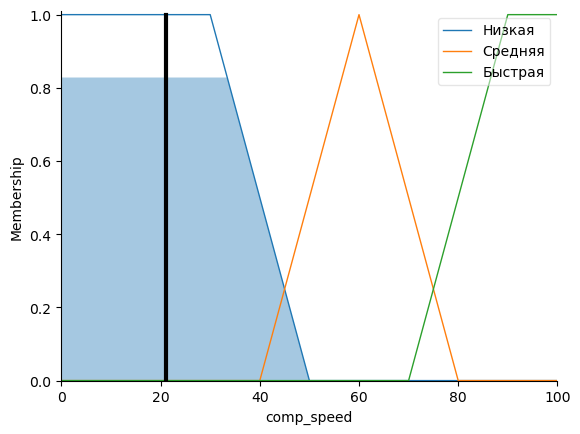

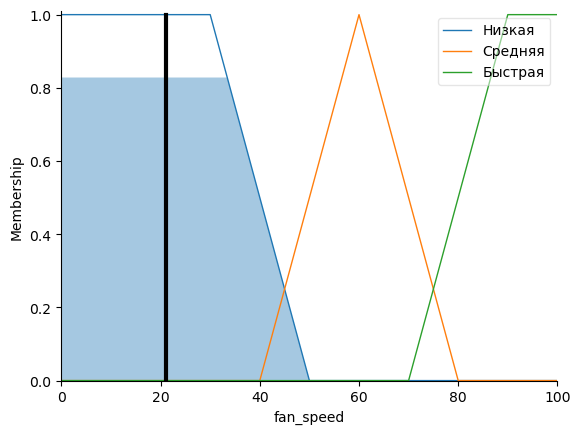

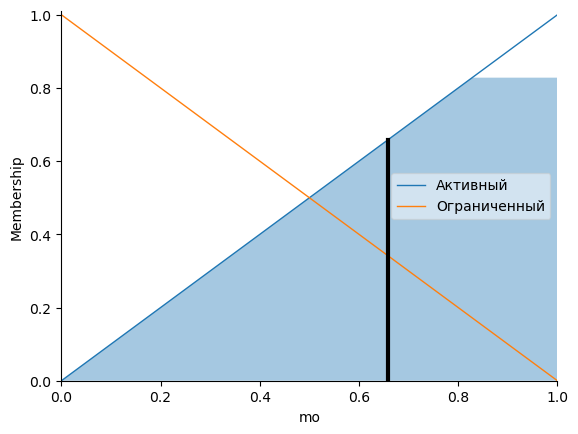

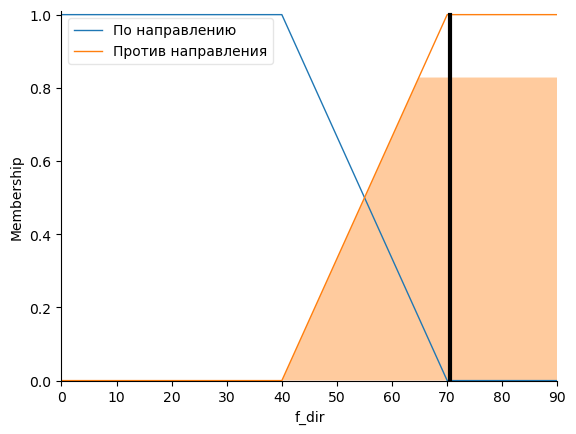

In [133]:
# Test 2
ac.input['temp'] = temp_list[0]
ac.input['t_dif'] = tdif_list[0]
ac.input['dew'] = dew_list[0]
ac.input['ev'] = ev_list[0]
ac.compute()
c_speed.view(sim = ac)
f_speed.view(sim = ac)
mo.view(sim = ac)
f_dir.view(sim=ac)

In [134]:
get_linguist(f_speed,ac.output['fan_speed'],f_speed_range)

'Низкая'

<h1>Вывод</h1>

1. В ходе работы была построена модель нечеткого управления кондиционера, который регулирует свои параметры для оптимального энергопотребления.
2. В ходе работы были получены навыки работы с моделью нечеткой логики. Создание парвил нечеткой логики, написание нечетких переменных и написание модели нечеткого управления.
3. Получены навыки работы с библиотекой skfuzzy -  библиотека набора инструменттов нечеткой логики.<br>
Документация: https://pythonhosted.org/scikit-fuzzy/
4. Провел тестирование модели и анализ полученных результатов после тестирования.
5. Построены графики начальных данных, и для показа результатов тестирования.